In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from pprint import pprint

In [84]:
df = pd.read_csv('./letterdata.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [85]:
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [86]:
X = df.drop(['letter'], axis = 1)
Y = df.letter
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size= 0.15, random_state= 1)
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(17000, 16)
(3000, 16)
(17000,)
(3000,)


In [87]:
from sklearn.svm import SVC
svmc = SVC(gamma= 0.025, C= 3)
svmc.fit(X_TRAIN, Y_TRAIN)

SVC(C=3, gamma=0.025)

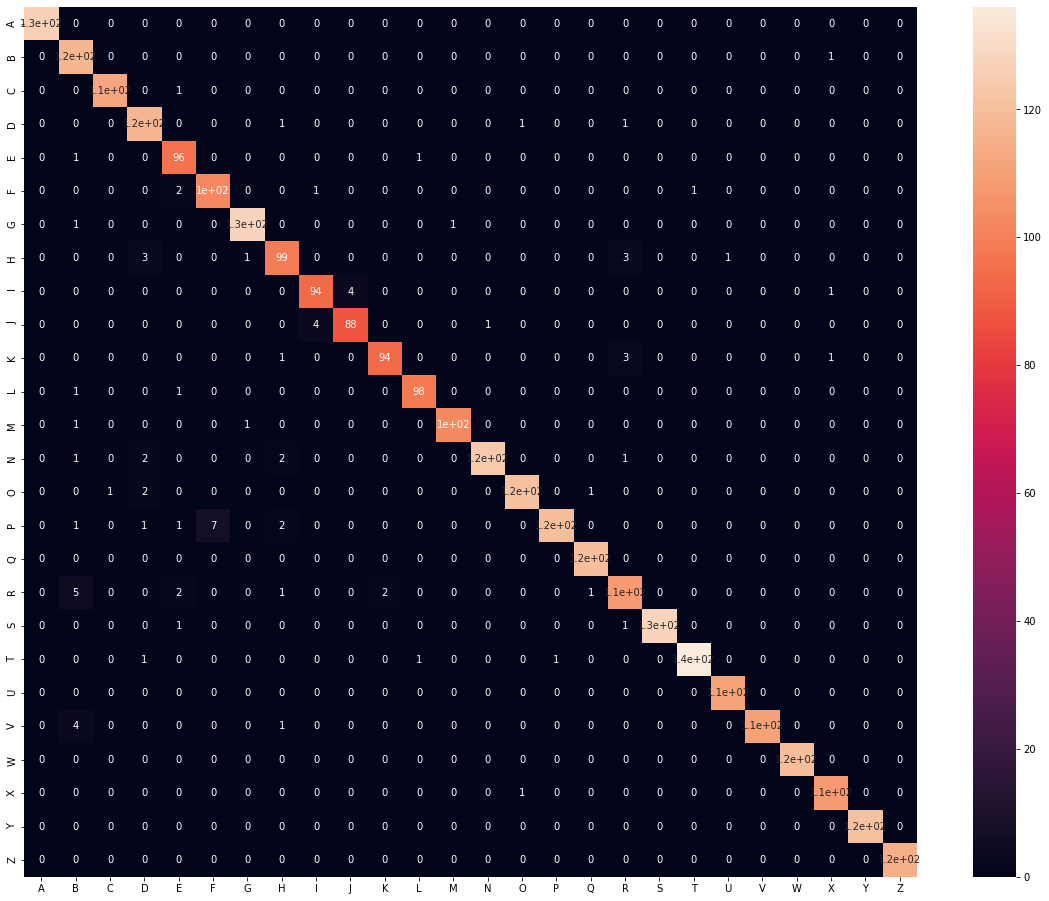

In [88]:
import string
lab= list(string.ascii_uppercase[0:26])
y_pred = svmc.predict(X_TEST)
cm = confusion_matrix(Y_TEST, y_pred, labels= lab)
df2 = pd.DataFrame(cm, index= lab, columns= lab)
plt.figure(figsize = (20,16))
sb.heatmap(df2, annot=True);

In [89]:
pprint(classification_report(Y_TEST, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           A       1.00      1.00      1.00       126\n'
 '           B       0.89      0.99      0.94       118\n'
 '           C       0.99      0.99      0.99       113\n'
 '           D       0.93      0.97      0.95       120\n'
 '           E       0.92      0.98      0.95        98\n'
 '           F       0.94      0.96      0.95       106\n'
 '           G       0.98      0.98      0.98       130\n'
 '           H       0.93      0.93      0.93       107\n'
 '           I       0.95      0.95      0.95        99\n'
 '           J       0.96      0.95      0.95        93\n'
 '           K       0.98      0.95      0.96        99\n'
 '           L       0.98      0.98      0.98       100\n'
 '           M       0.99      0.98      0.99       105\n'
 '           N       0.99      0.95      0.97       130\n'
 '           O       0.98      0.97      0.98       125\n'
 '           P       0.99      0.91      0.95     

In [90]:
precision_score(Y_TEST, y_pred, average=None)

array([1.        , 0.88636364, 0.99115044, 0.92857143, 0.92307692,
       0.93577982, 0.98461538, 0.92523364, 0.94949495, 0.95652174,
       0.97916667, 0.98      , 0.99038462, 0.992     , 0.98373984,
       0.99173554, 0.98360656, 0.92307692, 1.        , 0.99270073,
       0.99107143, 1.        , 1.        , 0.97297297, 1.        ,
       1.        ])

In [91]:
def getaccuracy(TEST, PRED):
    correct = 0
    for i in range(len(TEST)):
        if TEST[i] == PRED[i]:
            correct+=1
    return correct/float(len(TEST))*100.0

In [92]:
getaccuracy(list(Y_TEST), list(y_pred))

97.2